# *Exploratory Data Analysis and Data Cleaning*  
## Telco Customer Churn Projec


This notebook covers the Exploratory Data Analysis (EDA) and data cleaning phase of the Telco Customer Churn project.

The objective is to understand the structure, quality, and limitations of the dataset, as well as to prepare the data for modeling. This includes inspecting data types, identifying missing values, reviewing categorical variables, performing feature encoding, and validating initial assumptions.

The outcome of this notebook is a cleaned and properly structured dataset, split into training and test sets, ready to be used in subsequent modeling and analysis steps.
ps.


## Data Loading and Initial Setup

In this section, the required libraries are imported and the dataset is loaded into the analysis environment. This step establishes the base structure that will be used throughout the exploratory analysis and data cleaning process.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("Telco_customer_churn_DATASET.xlsx")

## Dataset Overview

This section provides an initial overview of the dataset to understand its general structure. The focus is on inspecting the number of observations and features, data types, and the presence of missing values.

This high-level inspection helps identify potential data quality issues and guides the subsequent cleaning and preprocessing steps.


In [3]:
data.shape

(7043, 33)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [5]:
data.head(3)

CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   

  Paperless Billing    Payment Method  Monthly Charges Total Charges  \
0               Yes      Mailed check            53.85        108.15   
1               Yes  Electronic check            70.70        151.65   
2               Yes  Electronic check            99.65         820.5   

  Churn Label Churn Value Churn Score  CLTV                  Churn Reason  
0         Yes           1          86  3239  Competitor made better offer  
1         Yes           1          67  2701                         Moved  
2         Yes           1          86  5372                         Moved  

[3 rows x 33 columns]

In [6]:
data.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [7]:
data.describe().round(2)

Count  Zip Code  Latitude  Longitude  Tenure Months  Monthly Charges  \
count  7043.0   7043.00   7043.00    7043.00        7043.00          7043.00   
mean      1.0  93521.96     36.28    -119.80          32.37            64.76   
std       0.0   1865.79      2.46       2.16          24.56            30.09   
min       1.0  90001.00     32.56    -124.30           0.00            18.25   
25%       1.0  92102.00     34.03    -121.82           9.00            35.50   
50%       1.0  93552.00     36.39    -119.73          29.00            70.35   
75%       1.0  95351.00     38.22    -118.04          55.00            89.85   
max       1.0  96161.00     41.96    -114.19          72.00           118.75   

       Churn Value  Churn Score     CLTV  
count      7043.00      7043.00  7043.00  
mean          0.27        58.70  4400.30  
std           0.44        21.53  1183.06  
min           0.00         5.00  2003.00  
25%           0.00        40.00  3469.00  
50%           0.00        61.00  4527.00  
75%           1.00        75.00  5380.50  
max           1.00       100.00  6500.00

## Basic Structural Data Cleaning

Before performing any detailed variable-level inspection or making feature removal decisions, a basic structural cleaning step is applied to the dataset.

The purpose of this step is not to alter the meaning of the data, but to ensure consistency in how values are represented. This helps prevent artificial inflation of category counts and misleading conclusions during the exploratory analysis.

At this stage, only minimal and non-destructive cleaning actions are performed:
- Removal of leading and trailing whitespace in string-based columns
- Normalization of text-based categorical values (e.g. consistent casing and spacing)
- Conversion of improperly encoded empty values to missing values
- Validation and correction of obvious data type inconsistencies

As part of the structural cleaning process, the dataset is checked for fully duplicated rows, which are removed to ensure data consistency.

This structural cleaning step ensures that subsequent analyses, such as cardinality checks and frequency tables, are based on a clean and consistent representation of the data.


In [8]:
# Identify object (string-based) columns
object_cols = data.select_dtypes(include="object").columns

# Remove duplicates
data = data.drop_duplicates()

# Strip leading/trailing whitespace and normalize internal spacing
for col in object_cols:
    data[col] = (
        data[col]
        .astype("string")
        .str.strip()
        .str.replace(r"\s+", " ", regex=True)
        .str.lower()
    )

# Replace empty strings with NaN
data[object_cols] = data[object_cols].replace("", pd.NA)

### Handling `Total Charges`: Data Type Correction and Missing Values

During the structural cleaning phase, the `Total Charges` column was identified as a numeric variable incorrectly stored as text. This issue prevents correct numerical analysis and must be resolved before further processing.

The column was first parsed and converted to a numeric format. As a result of this conversion, a small number of missing values emerged. These missing values correspond to customers with zero tenure, meaning they had not completed a full billing cycle.

In these cases, the total amount charged is logically equivalent to the monthly charge. Therefore, the missing values in `Total Charges` were imputed using the corresponding values from `Monthly Charges`.

After this correction, the column contains valid numeric values with no remaining missing data.


In [9]:
import numpy as np

def parse_total_charges(value):
    """
    Parse Total Charges values to float.
    Non-numeric or empty values are converted to NaN.
    """
    if isinstance(value, (int, float, np.number)):
        return float(value)

    s = str(value).strip()
    if s == "":
        return np.nan

    s = s.replace(",", ".")

    try:
        return float(s)
    except ValueError:
        return np.nan


# Apply parsing
data["Total Charges"] = data["Total Charges"].apply(parse_total_charges)

# Validation
print("Total Charges dtype:", data["Total Charges"].dtype)
print("Missing values after parsing:", data["Total Charges"].isna().sum())


Total Charges dtype: float64
Missing values after parsing: 11


In [10]:
mask_missing_total_charges = (
    data["Total Charges"].isna() &
    (data["Tenure Months"] == 0)
)

print("Rows to impute:", mask_missing_total_charges.sum())

data.loc[
    mask_missing_total_charges,
    ["Tenure Months", "Monthly Charges", "Total Charges"]
].head(11)


Rows to impute: 11


Tenure Months  Monthly Charges  Total Charges
2234              0            52.55            NaN
2438              0            20.25            NaN
2568              0            80.85            NaN
2667              0            25.75            NaN
2856              0            56.05            NaN
4331              0            19.85            NaN
4687              0            25.35            NaN
5104              0            20.00            NaN
5719              0            19.70            NaN
6772              0            73.35            NaN
6840              0            61.90            NaN

In [11]:
data.loc[
    mask_missing_total_charges,
    "Total Charges"
] = data.loc[
    mask_missing_total_charges,
    "Monthly Charges"
]

# Final check
print("Missing values after imputation:", data["Total Charges"].isna().sum())


Missing values after imputation: 0


## Variable-Level Inspection

In this section, each feature is inspected at the column level to better understand data types, missing values, and the distribution of categorical variables.

A summary table is used to identify variables with a large number of unique values, which may require special handling or further inspection. When needed, individual columns are explored in more detail.


In [12]:

def build_column_profile_table(
    data: pd.DataFrame,
    unique_threshold: int = 5,
    sort_values: bool = True
) -> pd.DataFrame:
    """
    Build a compact profiling table for each column in a DataFrame.

    Included fields:
    - column_name
    - dtype
    - missing_count (NaN/None)
    - missing_pct (percentage of missing values)
    - n_categories (unique count incl. NaN)
    - unique_values (list, but replaced with 'many unique' if n_categories is above threshold)
    - frequencies (list aligned with unique_values, or 'many unique')

    Rule:
    - If nunique(dropna=False) > unique_threshold, then:
        unique_values / frequencies -> 'many unique'
      (dtype + missing stats are still shown).
    """

    n_rows = len(data)
    rows = []

    for col in data.columns:
        s = data[col]

        # Basic metadata
        dtype = s.dtype
        missing_count = int(s.isna().sum())
        missing_pct = (missing_count / n_rows * 100) if n_rows > 0 else 0.0

        # Unique values count including NaN
        n_unique = s.nunique(dropna=False)

        # Apply the "many unique" rule
        if n_unique > unique_threshold:
            rows.append({
                "column_name": col,
                "dtype": str(dtype),
                "missing_count": missing_count,
                "missing_pct": round(missing_pct, 2),
                "n_categories": int(n_unique),
                "unique_values": "many unique",
                "frequencies": "many unique",
            })
            continue

        # Value counts including NaN
        vc = s.value_counts(dropna=False)

        # Choose ordering for unique values
        if sort_values:
            # Sorting can fail with mixed types; fallback to string-based sorting.
            try:
                unique_vals = sorted(vc.index.tolist())
            except TypeError:
                unique_vals = sorted(vc.index.tolist(), key=lambda x: str(x))
        else:
            # Frequency order (descending)
            unique_vals = vc.index.tolist()

        freqs = [int(vc.loc[val]) for val in unique_vals]

        rows.append({
            "column_name": col,
            "dtype": str(dtype),
            "missing_count": missing_count,
            "missing_pct": round(missing_pct, 2),
            "n_categories": int(n_unique),
            "unique_values": unique_vals,
            "frequencies": freqs,
        })

    return pd.DataFrame(rows)

profile_table = build_column_profile_table(data, unique_threshold=5, sort_values=True)
profile_table


column_name    dtype  missing_count  missing_pct  n_categories  \
0          CustomerID   string              0         0.00          7043   
1               Count    int64              0         0.00             1   
2             Country   string              0         0.00             1   
3               State   string              0         0.00             1   
4                City   string              0         0.00          1129   
5            Zip Code    int64              0         0.00          1652   
6            Lat Long   string              0         0.00          1652   
7            Latitude  float64              0         0.00          1652   
8           Longitude  float64              0         0.00          1651   
9              Gender   string              0         0.00             2   
10     Senior Citizen   string              0         0.00             2   
11            Partner   string              0         0.00             2   
12         Dependents   string              0         0.00             2   
13      Tenure Months    int64              0         0.00            73   
14      Phone Service   string              0         0.00             2   
15     Multiple Lines   string              0         0.00             3   
16   Internet Service   string              0         0.00             3   
17    Online Security   string              0         0.00             3   
18      Online Backup   string              0         0.00             3   
19  Device Protection   string              0         0.00             3   
20       Tech Support   string              0         0.00             3   
21       Streaming TV   string              0         0.00             3   
22   Streaming Movies   string              0         0.00             3   
23           Contract   string              0         0.00             3   
24  Paperless Billing   string              0         0.00             2   
25     Payment Method   string              0         0.00             4   
26    Monthly Charges  float64              0         0.00          1585   
27      Total Charges  float64              0         0.00          6534   
28        Churn Label   string              0         0.00             2   
29        Churn Value    int64              0         0.00             2   
30        Churn Score    int64              0         0.00            85   
31               CLTV    int64              0         0.00          3438   
32       Churn Reason   string           5174        73.46            21   

                                        unique_values  \
0                                         many unique   
1                                                 [1]   
2                                     [united states]   
3                                        [california]   
4                                         many unique   
5                                         many unique   
6                                         many unique   
7                                         many unique   
8                                         many unique   
9                                      [female, male]   
10                                          [no, yes]   
11                                          [no, yes]   
12                                          [no, yes]   
13                                        many unique   
14                                          [no, yes]   
15                        [no, no phone service, yes]   
16                             [dsl, fiber optic, no]   
17                     [no, no internet service, yes]   
18                     [no, no internet service, yes]   
19                     [no, no internet service, yes]   
20                     [no, no internet service, yes]   
21                     [no, no internet service, yes]   
22                     [no, no internet service, yes]   
23               [month-to-month, one year, two year]   


In [13]:
import pandas as pd

def explore_many_unique_columns(
    data: pd.DataFrame,
    unique_threshold: int = 5,
    top_n: int | None = None,
    include_missing: bool = True
) -> pd.DataFrame:
    """
    Return a tidy DataFrame to explore columns with many unique values.

    Output columns:
    - column_name
    - value
    - frequency

    Rules:
    - Only includes columns where nunique(dropna=False) > unique_threshold.
    - If top_n is provided, it keeps only the top N most frequent values per column.
    - include_missing controls whether NaN is included in value counts.
    """

    rows = []

    for col in data.columns:
        s = data[col]

        nunique = s.nunique(dropna=False)
        if nunique <= unique_threshold:
            continue

        vc = s.value_counts(dropna=not include_missing)

        if top_n is not None:
            vc = vc.head(top_n)

        for val, freq in vc.items():
            rows.append({
                "column_name": col,
                "value": val,
                "frequency": int(freq),
            })

    return pd.DataFrame(rows)


# Example usage:
many_unique_details = explore_many_unique_columns(data, unique_threshold=5, top_n=1, include_missing=True)
many_unique_details


column_name                   value  frequency
0        CustomerID              3668-qpybk          1
1              City             los angeles        305
2          Zip Code                   90003          5
3          Lat Long  33.964131, -118.272783          5
4          Latitude               33.964131          5
5         Longitude             -121.994813          8
6     Tenure Months                       1        613
7   Monthly Charges                   20.05         61
8     Total Charges                    20.2         11
9       Churn Score                      80        151
10             CLTV                    5546          8
11     Churn Reason                    <NA>       5174

In [14]:
import pandas as pd

def explore_single_column(
    data: pd.DataFrame,
    column_name: str,
    top_n: int | None = None,
    include_missing: bool = True,
    sort_by_frequency: bool = True
) -> pd.DataFrame:
    """
    Explore a single column and return a DataFrame with:
    - value
    - frequency

    This is intended for detailed inspection of columns
    with many unique values.
    """

    s = data[column_name]

    vc = s.value_counts(dropna=not include_missing)

    if top_n is not None:
            vc = vc.head(top_n)

    df = vc.reset_index()
    df.columns = ["value", "frequency"]

    if not sort_by_frequency:
        # Sort by value instead of frequency (stable view)
        try:
            df = df.sort_values("value")
        except TypeError:
            df = df.sort_values("value", key=lambda x: x.astype(str))

    return df


In [15]:
selected_col = "Total Charges"
col_profile = explore_single_column(data, selected_col, top_n=10)
col_profile


value  frequency
0  20.20         11
1  19.75          9
2  20.05          8
3  19.65          8
4  19.90          8
5  45.30          7
6  19.55          7
7  20.25          7
8  20.15          6
9  19.45          6

## Data Cleaning and Feature Removal



### Removal of Constant-Value Features

Some features contain the same value across all observations, resulting in zero variance. These variables do not provide any discriminatory power and therefore do not contribute to the analysis or modeling process.

Based on the variable-level inspection, the following columns were identified as constant-value features and were removed from the dataset:
- `Count`
- `Country`
- `State`

Removing these features simplifies the dataset without any loss of information.


In [16]:
data.drop(columns=["Count", "Country", "State"], inplace=True)

In [17]:
data.columns

Index(['CustomerID', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude',
       'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

### Removal of Identifier Features

Some variables act purely as unique identifiers rather than informative features. These variables are designed to uniquely identify each observation and do not capture any behavioral or business-related patterns.

The `CustomerID` column contains a unique value for each record and therefore does not provide any predictive or analytical value. Including it in the analysis would only introduce noise and potential data leakage.

For this reason, `CustomerID` was removed from the dataset.


In [18]:
data.drop(columns="CustomerID", inplace=True)

In [19]:
data.columns

Index(['City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Gender',
       'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

### Removal of High-Cardinality Geographic Features

Some features may appear potentially informative from a business perspective but present important limitations in their raw form.

The variables `Zip Code` and `City` could, in principle, capture geographic or socio-economic patterns related to customer behavior. However, in this dataset they exhibit very high cardinality and represent nominal identifiers rather than meaningful numerical features.

Without additional feature engineering (e.g. regional aggregation) or external data enrichment, these variables are more likely to introduce noise and overfitting than predictive signal. For this reason, both `Zip Code` and `City` were removed from the daset.



In [20]:
data.drop(columns=["Zip Code","City"], inplace=True)

In [21]:
data.columns

Index(['Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

### Removal of Redundant Target Representation

During the inspection of the target-related variables, two columns were found to represent the same underlying information regarding customer churn.

The variable `Churn Label` is a categorical representation with values `"Yes"` and `"No"`, while `Churn Value` encodes the same outcome in a binary numeric format (`1` for churn, `0` otherwise). Since both variables convey identical information, keeping both would introduce perfect redundancy into the dataset.

To maintain a single, consistent target variable and avoid unnecessary duplication, `Churn Label` was removed. The numeric variable `Churn Value` was retained as the sole target variable, as it is directly compatible with machine learning models and evaluation metrics without requiring additional encoding.


In [22]:
data[["Churn Label", "Churn Value"]]

Churn Label  Churn Value
0            yes            1
1            yes            1
2            yes            1
3            yes            1
4            yes            1
...          ...          ...
7038          no            0
7039          no            0
7040          no            0
7041          no            0
7042          no            0

[7043 rows x 2 columns]

In [23]:
data.drop(columns="Churn Label", inplace=True)

In [24]:
data.columns

Index(['Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Value', 'Churn Score',
       'CLTV', 'Churn Reason'],
      dtype='object')

### Removal of Post-Event Target Leakage Features

During feature inspection, two variables were identified as containing information that is only available after the churn event has already occurred.

The variable `Churn Score` represents a churn-related score computed with knowledge of the actual churn outcome, while `Churn Reason` explicitly describes the reason for customer churn once the event has taken place. Both variables therefore encode post-event information that would not be available at the time a predictive model is deployed.

Including such variables in a supervised learning context would introduce target leakage, leading to overly optimistic performance and invalid model behavior. Since the objective of this project is to infer churn risk before it happens, these features are not suitable as explanatory variables.

Additionally, these variables were not retained for the customer segmentation phase using K-means, as the clustering objective focuses on preventive, behavior-based segmentation rather than post-churn explanation.

For these reasons, both `Churn Score` and `Churn Reason` were removed from the dataset.


In [25]:
data.drop(columns=["Churn Score", "Churn Reason"], inplace=True)

In [26]:
data.columns

Index(['Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Value', 'CLTV'],
      dtype='object')

### Removal of Redundant Composite Geographic Feature

During the review of the remaining geographic variables, the column `Lat Long` was identified as a composite string representation combining latitude and longitude values into a single text field.

Since the dataset already contains the numeric variables `Latitude` and `Longitude` as separate columns, `Lat Long` does not provide any additional information. Moreover, being stored as a string, it cannot be directly used in numerical analysis or modeling without unnecessary parsing and transformation.

Keeping this variable would therefore introduce redundancy without analytical benefit. For this reason, the `Lat Long` column was removed, retaining only the numeric geographic coordinates for any potential later analysis.


In [27]:
data.drop(columns="Lat Long", inplace=True)

In [28]:
data.columns

Index(['Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner',
       'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges',
       'Total Charges', 'Churn Value', 'CLTV'],
      dtype='object')

## Feature Relevance Assessment

### Gender

**Hypothesis**

Customer churn behavior may vary across genders due to potential differences in service usage patterns, pricing sensitivity, or contract preferences.

**Exploratory Analysis**

The distribution of customers by gender was first inspected to ensure a balanced representation. Subsequently, the proportion of customers who churned was analyzed separately for each gender using a visual comparison.

The resulting distribution shows that churn rates for male and female customers are very similar, with no meaningful separation or dominant pattern observed between the two groups.

**Interpretation and Decision**

Since the likelihood of churn appears to be comparable across genders, the variable `Gender` does not provide relevant discriminatory power for predicting customer churn. Including this variable would add complexity without contributing meaningful explanatory signal.

For this reason, `Gender` was identified as a low-relevance feature and removed from the dataset.


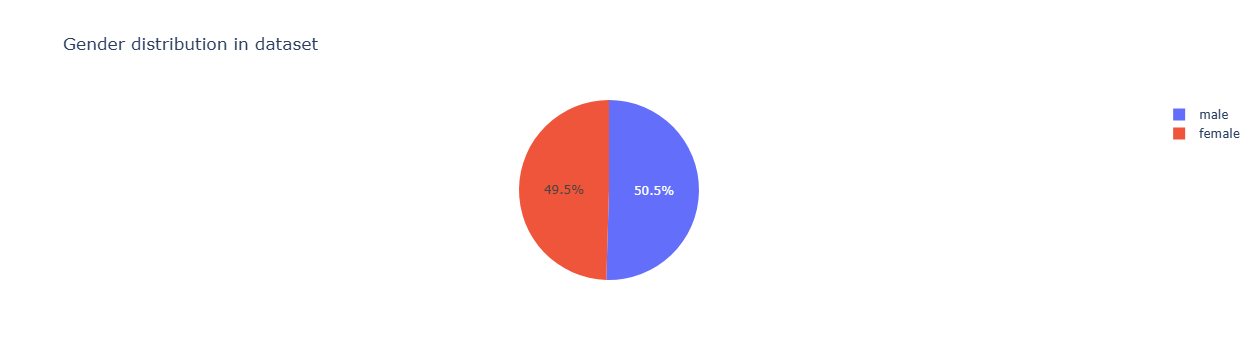

In [29]:
import plotly.express as px

fig = px.pie(
    data,
    names="Gender",
    title="Gender distribution in dataset"
)

fig.show()



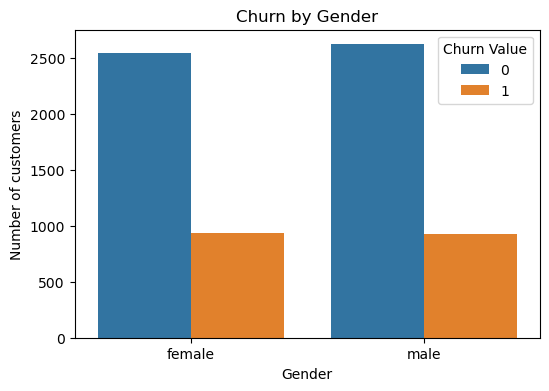

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

df_bar = (
    data.groupby(["Gender", "Churn Value"])
      .size()
      .reset_index(name="count")
)

plt.figure(figsize=(6, 4))
sns.barplot(
    data=df_bar,
    x="Gender",
    y="count",
    hue="Churn Value"
)
plt.title("Churn by Gender")
plt.ylabel("Number of customers")
plt.show()


In [31]:
data.drop(columns="Gender", inplace=True)

In [32]:
data.columns

Index(['Latitude', 'Longitude', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Value',
       'CLTV'],
      dtype='object')

#### Household and Demographic Features

The variables `Senior Citizen`, `Partner`, and `Dependents` were evaluated as part of the feature relevance assessment using visual comparisons of churn behavior.

Exploratory bar plots revealed clear differences in churn distribution across categories for each of these variables. Customers without dependents or a partner show higher churn levels, while senior citizens exhibit a distinct churn pattern compared to non-senior customers.

These observable differences suggest that household and demographic characteristics are meaningfully associated with churn behavior. For this reason, all three variables were retained for subsequent analysis and modeling.


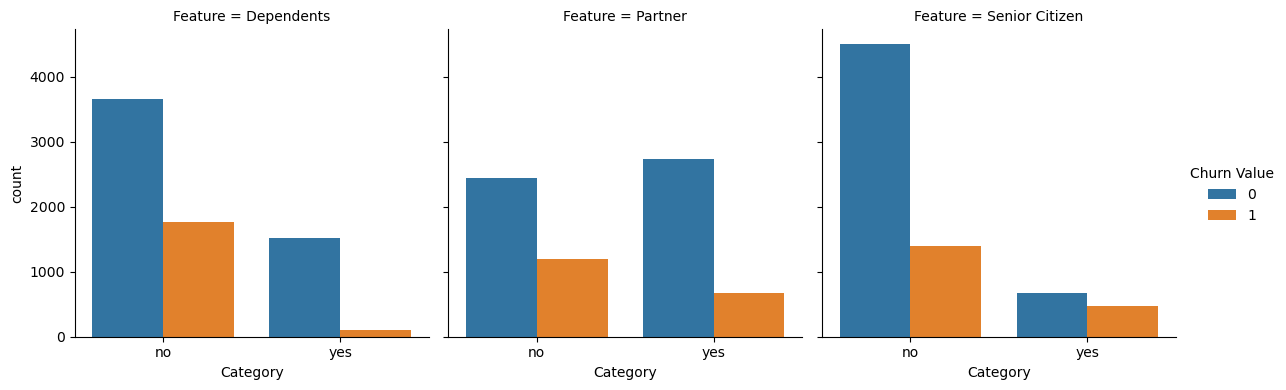

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

variables = ["Senior Citizen", "Partner", "Dependents"]

df_bar = (
    data
    .melt(
        id_vars="Churn Value",
        value_vars=variables,
        var_name="Feature",
        value_name="Category"
    )
    .groupby(["Feature", "Category", "Churn Value"])
    .size()
    .reset_index(name="count")
)

sns.catplot(
    data=df_bar,
    x="Category",
    y="count",
    hue="Churn Value",
    col="Feature",
    kind="bar",
    height=4,
    aspect=1
)

plt.show()


### Contractual and Billing Features

The contractual and billing-related variables were evaluated as part of the feature relevance assessment, as they describe how customers commit to the service and how payments are managed. These features are closely linked to customer behavior and typically play a key role in explaining churn.

**Contract**

Churn behavior differs substantially across contract types. Customers on `month-to-month` contracts exhibit a markedly higher churn rate compared to those with longer commitments. Although both `one year` and `two year` contracts show significantly lower churn, a statistical comparison confirms that their churn rates are meaningfully different. As a result, all three contract categories were retained to preserve the observed explanatory signal.

**Paperless Billing**

Customers using paperless billing show a clearly higher churn rate than those who do not. This variable already has a simple binary structure and demonstrates a strong behavioral association with churn. Therefore, `Paperless Billing` was retained without transformation.

**Payment Method**

Churn rates vary notably across payment methods. Customers using `electronic check` present the highest churn levels, while `mailed check` shows an intermediate pattern. Automatic payment methods (`bank transfer (automatic)` and `credit card (automatic)`) display very similar churn behavior.

A statistical test comparing the two automatic payment methods indicates no significant difference in churn rates between them (p-value > 0.05). Consequently, these categories were grouped into a single `automatic` payment method. This transformation reduces categorical complexity while preserving meaningful churn-related information.
elated signal.


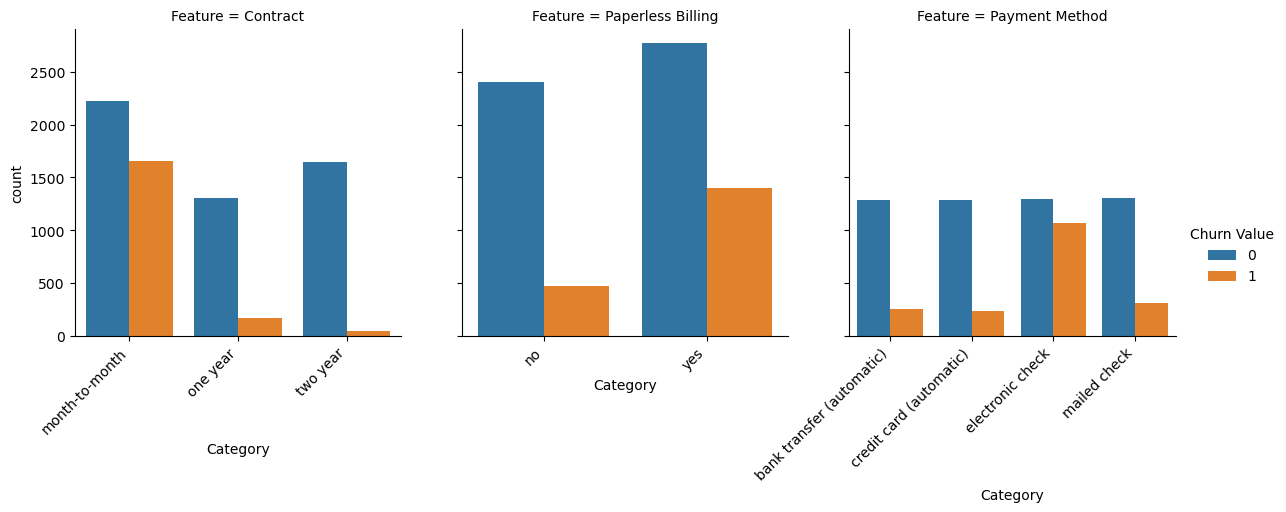

In [39]:
variables = ["Contract", "Paperless Billing", "Payment Method"]

df_bar = (
    data
    .melt(
        id_vars="Churn Value",
        value_vars=variables,
        var_name="Feature",
        value_name="Category"
    )
    .groupby(["Feature", "Category", "Churn Value"])
    .size()
    .reset_index(name="count")
)

g = sns.catplot(
        data=df_bar,
        x="Category",
        y="count",
        hue="Churn Value",
        col="Feature",
        kind="bar",
        height=4,
        aspect=1,
        sharex=False
)
g.set_xticklabels(rotation=45, ha="right")
plt.show()

In [42]:
summary = (
    data.groupby("Contract")["Churn Value"]
        .agg(customers="count", churn_rate="mean")
        .sort_values("churn_rate", ascending=False)
)

summary["churn_rate_pct"] = (summary["churn_rate"] * 100).round(2)
summary


customers  churn_rate  churn_rate_pct
Contract                                             
month-to-month       3875    0.427097           42.71
one year             1473    0.112695           11.27
two year             1695    0.028319            2.83

In [41]:
from statsmodels.stats.proportion import proportions_ztest

g1 = data[data["Contract"] == "one year"]["Churn Value"]
g2 = data[data["Contract"] == "two year"]["Churn Value"]

count = [g1.sum(), g2.sum()]        # churners
nobs  = [g1.count(), g2.count()]    # total

stat, pval = proportions_ztest(count, nobs)
pval



3.792770531121327e-21

In [43]:
summary = (
    data.groupby("Payment Method")["Churn Value"]
        .agg(customers="count", churn_rate="mean")
        .sort_values("churn_rate", ascending=False)
)

summary["churn_rate_pct"] = (summary["churn_rate"] * 100).round(2)
summary


customers  churn_rate  churn_rate_pct
Payment Method                                                  
electronic check                2365    0.452854           45.29
mailed check                    1612    0.191067           19.11
bank transfer (automatic)       1544    0.167098           16.71
credit card (automatic)         1522    0.152431           15.24

In [44]:
from statsmodels.stats.proportion import proportions_ztest

g1 = data[data["Payment Method"] == "bank transfer (automatic)"]["Churn Value"]
g2 = data[data["Payment Method"] == "credit card (automatic)"]["Churn Value"]

count = [g1.sum(), g2.sum()]
nobs  = [g1.count(), g2.count()]

stat, pval = proportions_ztest(count, nobs)
pval


0.2677952056502493

In [45]:
data["Payment Method"] = data["Payment Method"].replace({
    "bank transfer (automatic)": "automatic",
    "credit card (automatic)": "automatic"
})


In [48]:
data["Payment Method"].unique()

<StringArray>
['mailed check', 'electronic check', 'automatic']
Length: 3, dtype: string

In [49]:
data.columns

Index(['Latitude', 'Longitude', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Value',
       'CLTV'],
      dtype='object')

### Core Telco Services


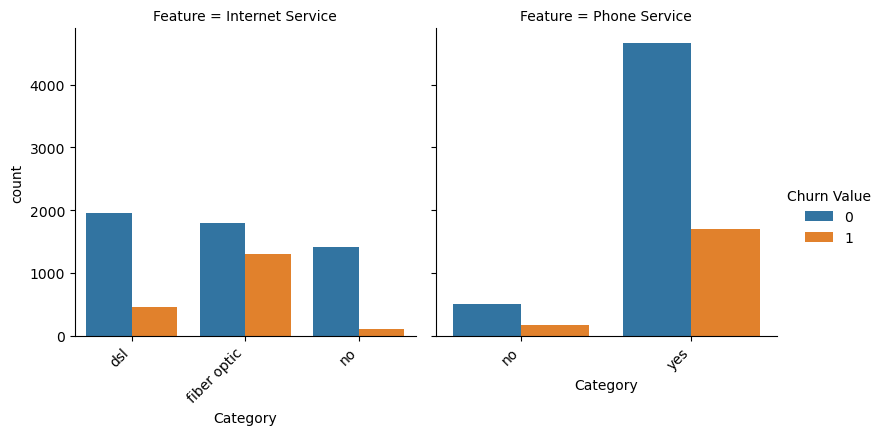

In [50]:
variables = ["Phone Service", "Internet Service"]

df_bar = (
    data
    .melt(
        id_vars="Churn Value",
        value_vars=variables,
        var_name="Feature",
        value_name="Category"
    )
    .groupby(["Feature", "Category", "Churn Value"])
    .size()
    .reset_index(name="count")
)

g = sns.catplot(
        data=df_bar,
        x="Category",
        y="count",
        hue="Churn Value",
        col="Feature",
        kind="bar",
        height=4,
        aspect=1,
        sharex=False
)
g.set_xticklabels(rotation=45, ha="right")
plt.show()

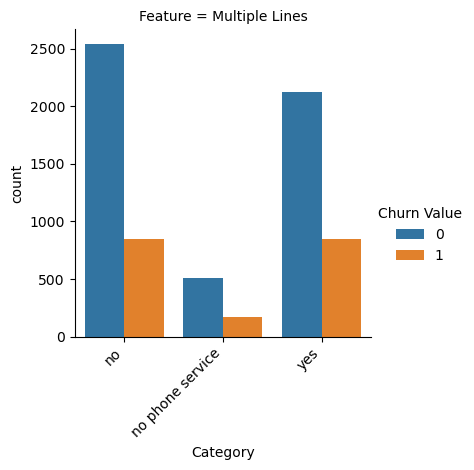

In [51]:
df_bar = (
    data
    .melt(
        id_vars="Churn Value",
        value_vars="Multiple Lines",
        var_name="Feature",
        value_name="Category"
    )
    .groupby(["Feature", "Category", "Churn Value"])
    .size()
    .reset_index(name="count")
)

g = sns.catplot(
        data=df_bar,
        x="Category",
        y="count",
        hue="Churn Value",
        col="Feature",
        kind="bar",
        height=4,
        aspect=1,
        sharex=False
)
g.set_xticklabels(rotation=45, ha="right")
plt.show()

In [52]:
summary = (
    data.groupby("Multiple Lines")["Churn Value"]
        .agg(customers="count", churn_rate="mean")
        .sort_values("churn_rate", ascending=False)
)

summary["churn_rate_pct"] = (summary["churn_rate"] * 100).round(2)
summary


customers  churn_rate  churn_rate_pct
Multiple Lines                                         
yes                    2971    0.286099           28.61
no                     3390    0.250442           25.04
no phone service        682    0.249267           24.93

In [53]:
subset = data[data["Multiple Lines"].isin(["yes", "no"])]


In [54]:
from statsmodels.stats.proportion import proportions_ztest

g1 = subset[subset["Multiple Lines"] == "yes"]["Churn Value"]
g2 = subset[subset["Multiple Lines"] == "no"]["Churn Value"]

count = [g1.sum(), g2.sum()]
nobs  = [g1.count(), g2.count()]

stat, pval = proportions_ztest(count, nobs)
pval


0.0013422845459112847

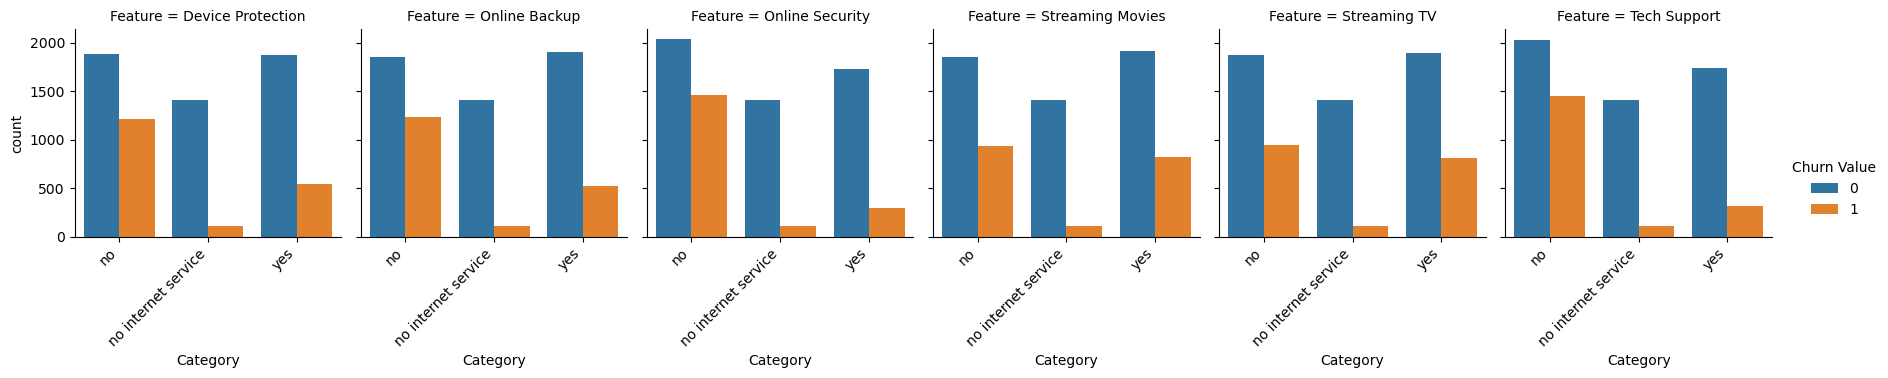

In [59]:
variables = ['Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies']

df_bar = (
    data
    .melt(
        id_vars="Churn Value",
        value_vars=variables,
        var_name="Feature",
        value_name="Category"
    )
    .groupby(["Feature", "Category", "Churn Value"])
    .size()
    .reset_index(name="count")
)

g = sns.catplot(
        data=df_bar,
        x="Category",
        y="count",
        hue="Churn Value",
        col="Feature",
        kind="bar",
        height=3,
        aspect=1,
        sharex=False
)
g.set_xticklabels(rotation=45, ha="right")
plt.show()

In [60]:
subset_tv = data[data["Streaming TV"].isin(["yes", "no"])]

summary_tv = (
    subset_tv.groupby("Streaming TV")["Churn Value"]
        .agg(customers="count", churn_rate="mean")
)

summary_tv["churn_rate_pct"] = (summary_tv["churn_rate"] * 100).round(2)
summary_tv


customers  churn_rate  churn_rate_pct
Streaming TV                                       
no                 2810    0.335231           33.52
yes                2707    0.300702           30.07

In [61]:
subset_movies = data[data["Streaming Movies"].isin(["yes", "no"])]

summary_movies = (
    subset_movies.groupby("Streaming Movies")["Churn Value"]
        .agg(customers="count", churn_rate="mean")
)

summary_movies["churn_rate_pct"] = (summary_movies["churn_rate"] * 100).round(2)
summary_movies


customers  churn_rate  churn_rate_pct
Streaming Movies                                       
no                     2785    0.336804           33.68
yes                    2732    0.299414           29.94

In [62]:
from statsmodels.stats.proportion import proportions_ztest

g1 = subset_tv[subset_tv["Streaming TV"] == "yes"]["Churn Value"]
g2 = subset_tv[subset_tv["Streaming TV"] == "no"]["Churn Value"]

count = [g1.sum(), g2.sum()]
nobs  = [g1.count(), g2.count()]

stat, pval_tv = proportions_ztest(count, nobs)
pval_tv


0.005914561158935956

In [63]:
g1 = subset_movies[subset_movies["Streaming Movies"] == "yes"]["Churn Value"]
g2 = subset_movies[subset_movies["Streaming Movies"] == "no"]["Churn Value"]

count = [g1.sum(), g2.sum()]
nobs  = [g1.count(), g2.count()]

stat, pval_movies = proportions_ztest(count, nobs)
pval_movies


0.002874147738204462

### 1. **Total Charges** viene totalmente explicada por Tenure Months y Monthly Charges: ELIMINAR

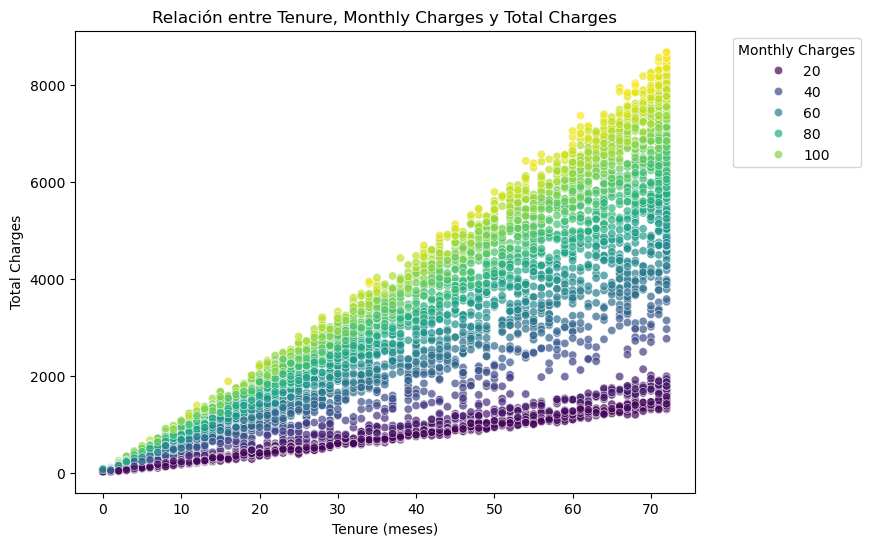

In [14]:
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(
    data=data,
    x="Tenure Months",      
    y="Total Charges",
    hue="Monthly Charges",
    palette="viridis",
    alpha=0.7
)

plt.title("Relación entre Tenure, Monthly Charges y Total Charges")
plt.xlabel("Tenure (meses)")
plt.ylabel("Total Charges")
plt.legend(title="Monthly Charges", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout
plt.savefig("churn_plot.svg", bbox_inches="tight")
plt.show()


### 2. Churn Label es la representación en texto de Churn Value: ELIMINAR

<Axes: xlabel='Churn Value', ylabel='Churn Label'>

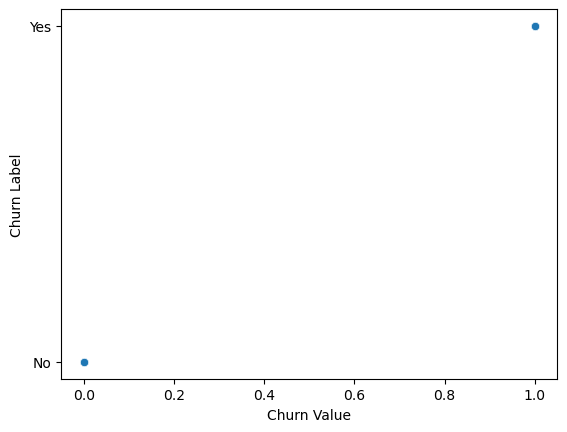

In [15]:
sns.scatterplot(                    
     data = data,
     x = "Churn Value",
     y = "Churn Label"
 )

In [16]:
(data["Churn Label"].map({"Yes": 1, "No": 0}) == data["Churn Value"]).all() 

True

### 3. **CustomerID** son todo valores unicos para todas las filas: ELIMINAR

In [17]:
data.shape[0] == data.CustomerID.nunique() #son todo valores distintos y aleatorios

True

In [18]:
data.CustomerID.duplicated().sum() #no hay duplicados

0

### 4. **Count, Country y State** son todo valores unicos para todas las filas: ELIMINAR

In [19]:
data.Count.unique(), data.Country.unique(), data.State.unique() # columnas con un valor único para todos los registros

(array([1], dtype=int64),
 array(['United States'], dtype=object),
 array(['California'], dtype=object))

### 5. **Lat Long** es una columna objeto totalmente explicada por Latitude y Longitud: ELIMINAR

In [20]:
data[["Lat Long", "Latitude", "Longitude"]].head(5) # vemos que es redundante

Lat Long   Latitude   Longitude
0  33.964131, -118.272783  33.964131 -118.272783
1   34.059281, -118.30742  34.059281 -118.307420
2  34.048013, -118.293953  34.048013 -118.293953
3  34.062125, -118.315709  34.062125 -118.315709
4  34.039224, -118.266293  34.039224 -118.266293

### 6. **Churn Score** es la predicción anterior que queremos mejorar: ELIMINAR (pero guardo copia para comparación posterior)

In [21]:
churn_score = data["Churn Score"].copy() # guardo una copia para comparar en el futuro

### 7. **Churn Reason** son los motivos de abandono del servicio. no puedo incluir en un modelo para predecir un dato que es posterior a dicha predicción: ELIMINAR (guardo copia y relleno nulos por "Not Churned", ya que coinciden con clientes que no abandonaron el servicio)

In [22]:
churn_reason = data["Churn Reason"].copy() # guardo una copia para comparar en el futuro

In [23]:
churn_reason = churn_reason.fillna("Not Churned") # sustituyo nulos por valores de personas que no hicieron churn

In [24]:
churn_reason

0        Competitor made better offer
1                               Moved
2                               Moved
3                               Moved
4       Competitor had better devices
                    ...              
7038                      Not Churned
7039                      Not Churned
7040                      Not Churned
7041                      Not Churned
7042                      Not Churned
Name: Churn Reason, Length: 7043, dtype: object

### 8. *City* tiene 1129 valores únicos en un df de 7043. Podemos agrupar por counties, pero aún así son 58, muy complicado de llevar a dummies: ELIMINAR

In [25]:
data.City.nunique()

1129

In [26]:
data["City"].value_counts(dropna=False)

City
Los Angeles       305
San Diego         150
San Jose          112
Sacramento        108
San Francisco     104
                 ... 
Healdsburg          4
Jenner              4
Philo               4
Point Arena         4
Olympic Valley      4
Name: count, Length: 1129, dtype: int64

C:\Users\osian\AppData\Local\Temp\ipykernel_11352\3068191003.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = data, x = "Gender", y = "Churn Value", palette="tab10")


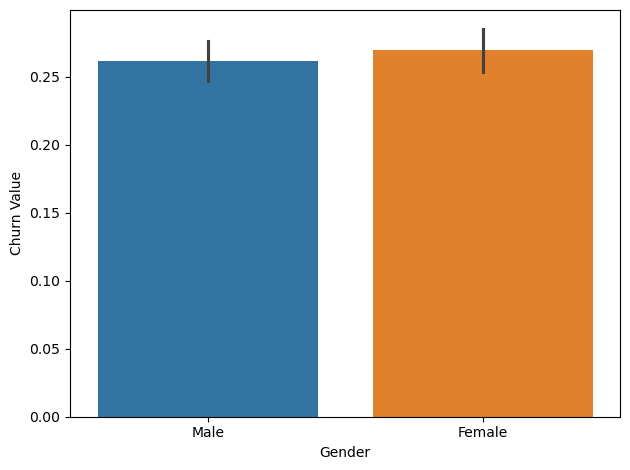

In [27]:
sns.barplot(data = data, x = "Gender", y = "Churn Value", palette="tab10")
plt.tight_layout()
plt.savefig("gender_plot.svg", bbox_inches="tight")
plt.show()

##### El genero no explica nada: ELIMINAR

## Columnas elegidas para ser eliminadas:  

In [28]:
data.drop(columns=["City","CustomerID", "Count", "Country", "State", "Lat Long", "Churn Score", "Churn Label", "Churn Reason", "Total Charges", "Gender"], inplace=True)

In [29]:
data.columns

Index(['Zip Code', 'Latitude', 'Longitude', 'Senior Citizen', 'Partner',
       'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges',
       'Churn Value', 'CLTV'],
      dtype='object')

### Tratamos duplicados: No hay asi que no hacemos nada

In [30]:
data.duplicated().sum()
# data = data.drop_duplicates()

0

## Limpieza básica inicial de espacios sobrantes y transformación a minúsculas de columnas categóricas

In [31]:
cols_cat = data.select_dtypes(include="object").columns

def clean_general(s):
    s = s.astype("string")
    s = s.str.strip()
    s = s.str.replace(r"\s+", " ", regex=True)
    s = s.str.lower()          # seguro en datos USA
    return s

data[cols_cat] = data[cols_cat].apply(clean_general)

In [32]:
data.head(3)

Zip Code   Latitude   Longitude Senior Citizen Partner Dependents  \
0     90003  33.964131 -118.272783             no      no         no   
1     90005  34.059281 -118.307420             no      no        yes   
2     90006  34.048013 -118.293953             no      no        yes   

   Tenure Months Phone Service Multiple Lines Internet Service  ...  \
0              2           yes             no              dsl  ...   
1              2           yes             no      fiber optic  ...   
2              8           yes            yes      fiber optic  ...   

  Device Protection Tech Support Streaming TV Streaming Movies  \
0                no           no           no               no   
1                no           no           no               no   
2               yes           no          yes              yes   

         Contract Paperless Billing    Payment Method Monthly Charges  \
0  month-to-month               yes      mailed check           53.85   
1  month-to-month               yes  electronic check           70.70   
2  month-to-month               yes  electronic check           99.65   

  Churn Value  CLTV  
0           1  3239  
1           1  2701  
2           1  5372  

[3 rows x 22 columns]

## Tratamiento de Nulos: Noy hay asi que no hacemos nada

In [33]:
data.isnull().sum()

Zip Code             0
Latitude             0
Longitude            0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Churn Value          0
CLTV                 0
dtype: int64

## Gráficos de análisis

### Countplot de variable objetivo: Tenemos datos evidentemente desbalanceados, asi que usaremos **smote** más adelante

C:\Users\osian\AppData\Local\Temp\ipykernel_11352\3534366596.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="Churn Value", palette="tab10")


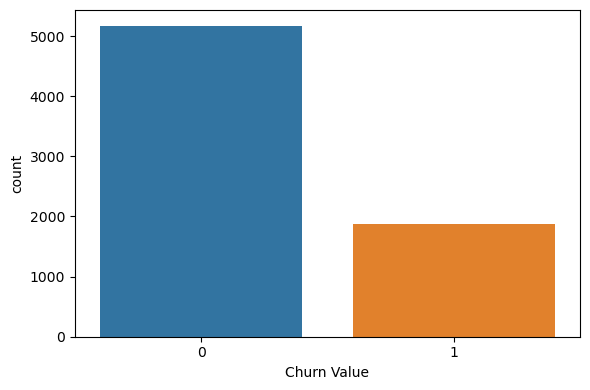

In [34]:
plt.figure(figsize=(6,4))
plt.xticks(rotation=0)
sns.countplot(data=data, x="Churn Value", palette="tab10")
plt.tight_layout()
plt.savefig("churnValue_plot.svg", bbox_inches="tight")
plt.show()

In [35]:
churn_percentage = (data["Churn Value"].sum() / data.shape[0] * 100).round(2)
churn_percentage

26.54

### Histogramas de variables numéricas: Apreciamos: 
##### 1. Zip code tiene valores muy repartidos y puede ser irrelevante
##### 2. Tenure Months y Monthly Charges tienen información interesante a explorar en detalle
##### 3. CLTV tiene 3 grupos marcados: gastaron hasta 4.000, gastaron hasta 6.000, y gastaron hasta 6.500

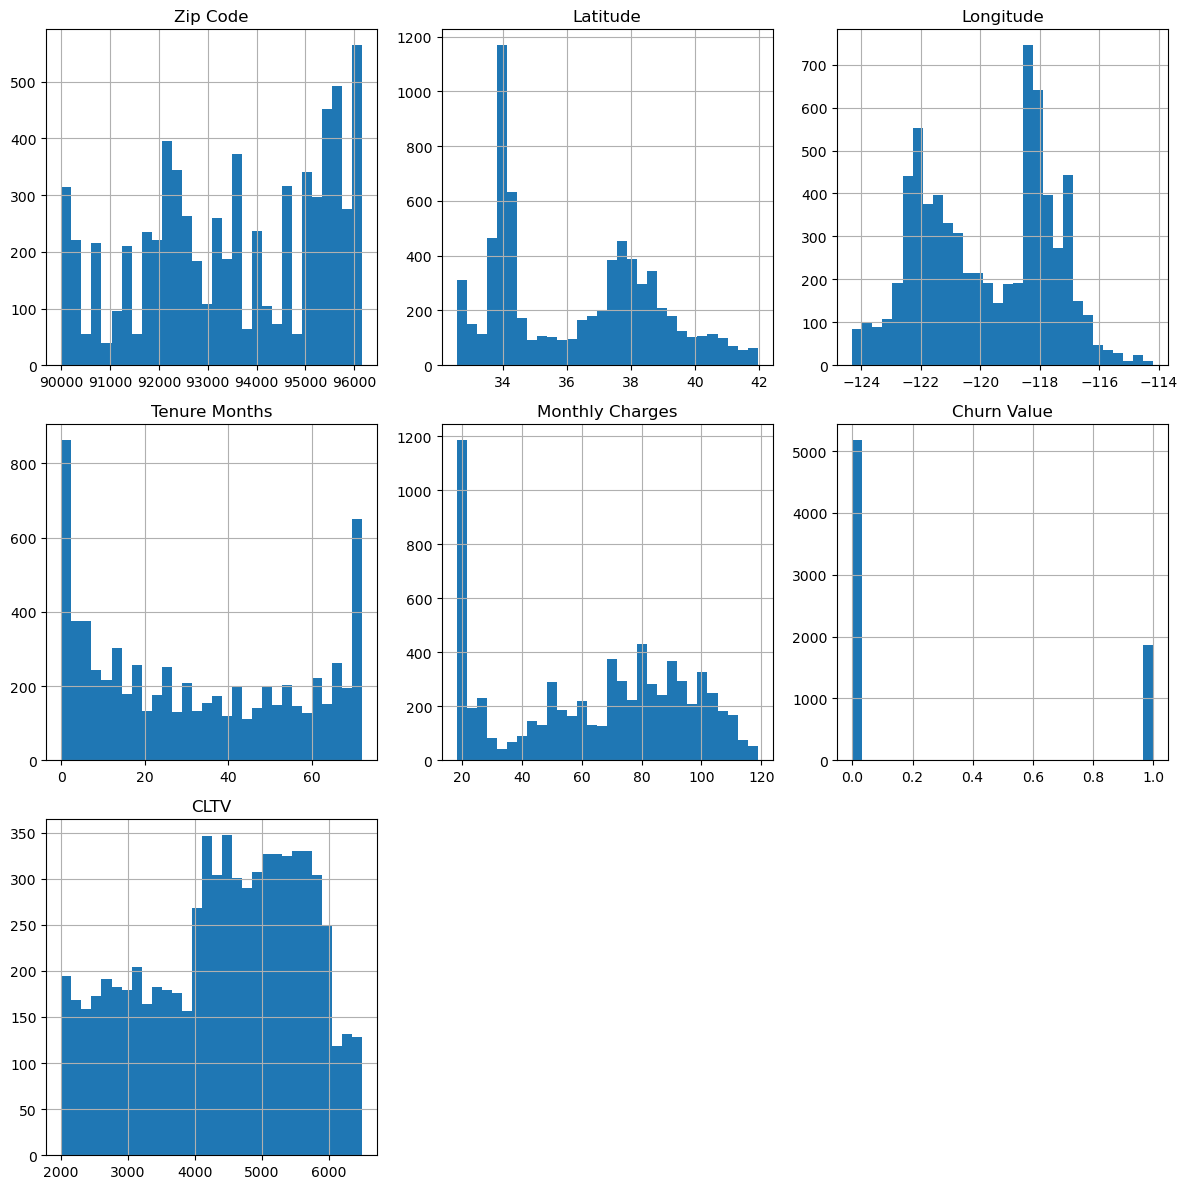

In [36]:
data.hist(figsize=(12,12), bins=30)
plt.tight_layout()
plt.show()

## Buscamos patrones concretos entre variables:  

### 1. CLTV - Contract. obs: No parece haber ninguna tendencia relevante, pero si ayudan a explicar la variable, porque hay diferencias significativas

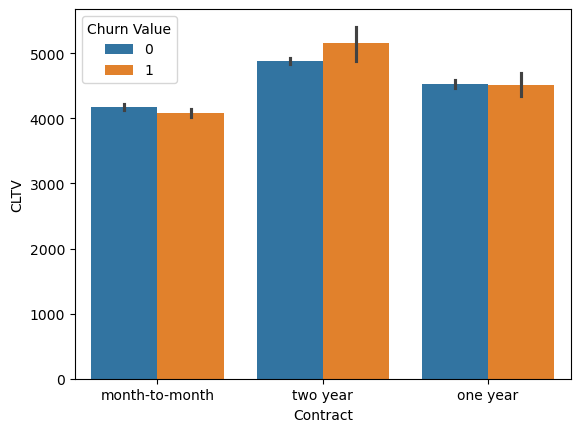

In [37]:
sns.barplot(data = data, x = "Contract", y = "CLTV", hue="Churn Value")
plt.show()

### 1. Monthly Charges - Tenure Months. obs: Aqui observamos una relación MUY directa con el churn. El comportamiento del churn respecto a estas varibles nos revela que: 
##### a) Los usuarios abandonan mucho el servicio en los primeros meses
##### b) Los usuarios que más abandonan el servicio son los que más cuota mensual pagan

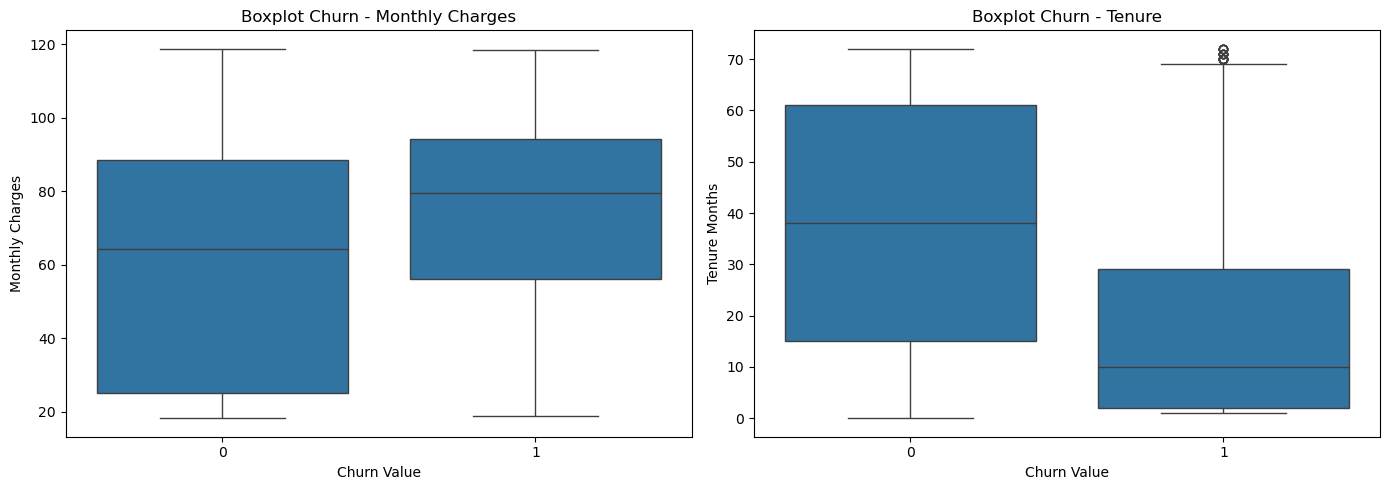

In [38]:

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=True)

sns.boxplot(data=data, x="Churn Value", y="Monthly Charges", ax=axes[0])
axes[0].set_title("Boxplot Churn - Monthly Charges")

sns.boxplot(data=data, x="Churn Value", y="Tenure Months", ax=axes[1])
axes[1].set_title("Boxplot Churn - Tenure")

plt.tight_layout()
plt.show()


C:\Users\osian\AppData\Local\Temp\ipykernel_11352\1758537576.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Monthly_bin")["Churn Value"]
C:\Users\osian\AppData\Local\Temp\ipykernel_11352\1758537576.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Tenure_bin")["Churn Value"]


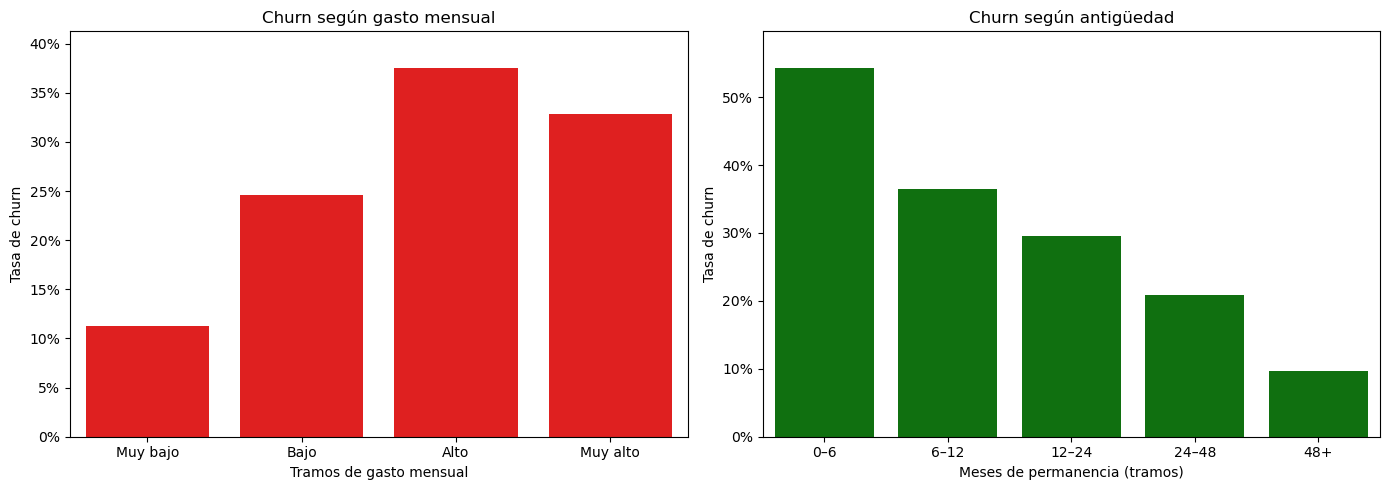

In [39]:
# Copia para no ensuciar el original
df = data.copy()

# --- 1) Tramos de gasto mensual + churn rate ---
df["Monthly_bin"] = pd.qcut(
    df["Monthly Charges"], q=4,
    labels=["Muy bajo", "Bajo", "Alto", "Muy alto"]
)

monthly_churn = (
    df.groupby("Monthly_bin")["Churn Value"]
      .mean()
      .reset_index(name="churn_rate")
)

# --- 2) Tramos de tenure + churn rate ---
bins = [0, 6, 12, 24, 48, np.inf]
labels = ["0–6", "6–12", "12–24", "24–48", "48+"]

df["Tenure_bin"] = pd.cut(
    df["Tenure Months"], bins=bins,
    labels=labels, right=False
)

tenure_churn = (
    df.groupby("Tenure_bin")["Churn Value"]
      .mean()
      .reset_index(name="churn_rate")
)

# --- Plots lado a lado ---
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(data=monthly_churn, x="Monthly_bin", y="churn_rate", color="red", ax=axes[0])
axes[0].set_ylabel("Tasa de churn")
axes[0].set_xlabel("Tramos de gasto mensual")
axes[0].set_title("Churn según gasto mensual")
axes[0].set_ylim(0, monthly_churn["churn_rate"].max() * 1.1)
axes[0].yaxis.set_major_formatter(lambda x, pos: f"{x:.0%}")

sns.barplot(data=tenure_churn, x="Tenure_bin", y="churn_rate", color="green",ax=axes[1])
axes[1].set_ylabel("Tasa de churn")
axes[1].set_xlabel("Meses de permanencia (tramos)")
axes[1].set_title("Churn según antigüedad")
axes[1].set_ylim(0, tenure_churn["churn_rate"].max() * 1.1)
axes[1].yaxis.set_major_formatter(lambda x, pos: f"{x:.0%}")

plt.tight_layout()
plt.savefig("Tenure_Charges_plots.svg", bbox_inches="tight")
plt.show()


##### Los clientes que abandonan pagan típicamente más al mes.
##### Es una señal clara de que Monthly Charges está asociado al churn.
##### Monthly Charges es una variable potencialmente importante para predecir churn.

C:\Users\osian\AppData\Local\Temp\ipykernel_11352\1014362279.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["Tenure_bin", "Monthly_bin"])["Churn Value"]


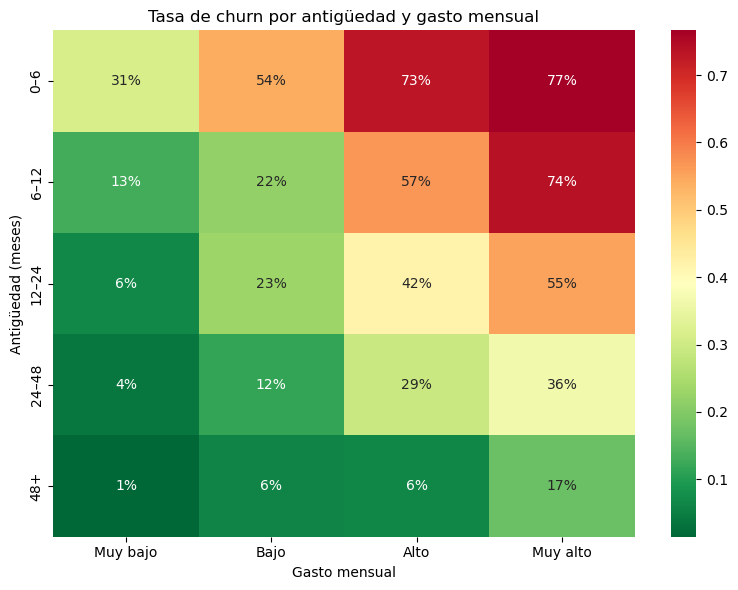

In [40]:
# Reutilizamos los bins anteriores o los ajustas a tu gusto
df["Monthly_bin"] = pd.qcut(df["Monthly Charges"], q=4,
                            labels=["Muy bajo", "Bajo", "Alto", "Muy alto"])

bins_tenure = [0, 6, 12, 24, 48, np.inf]
labels_tenure = ["0–6", "6–12", "12–24", "24–48", "48+"]

df["Tenure_bin"] = pd.cut(df["Tenure Months"], bins=bins_tenure,
                          labels=labels_tenure, right=False)

# Tabla de churn medio por combinación de tramos
heat = (
    df.groupby(["Tenure_bin", "Monthly_bin"])["Churn Value"]
      .mean()
      .unstack()   # filas = Tenure, columnas = Monthly
)

plt.figure(figsize=(8,6))
sns.heatmap(heat, annot=True, fmt=".0%", cmap="RdYlGn_r")
plt.title("Tasa de churn por antigüedad y gasto mensual")
plt.xlabel("Gasto mensual")
plt.ylabel("Antigüedad (meses)")

plt.tight_layout()
plt.savefig("Tenure_Charges_heatmap.svg", bbox_inches="tight")
plt.show()


## **Conclusion importante**: Los clientes que adoptan el servicio a bajo coste se fidelizan, pero aquellos que entran con muchos extras suelen abandonar. Esto es un dato muy importante para el área de negocio. 

## Analisis de multicolinealidad Exploratorio (solo columnas numéricas)

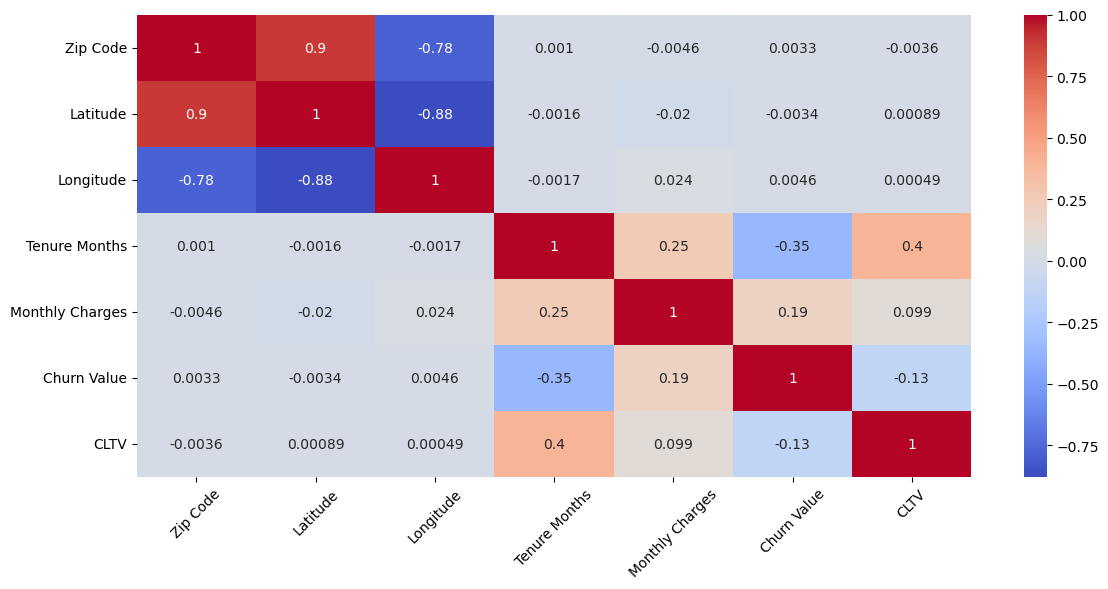

In [41]:
num_cols = data.select_dtypes(include=["int64", "float64"]).columns
corr = data[num_cols].corr()

plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("geo_corr_heatmap.svg", bbox_inches="tight")
plt.show()


### Eliminamos **Zip Code**(correlación altisima) y volvemos a ver el mapa de calor: 

In [42]:
data.drop(columns=["Zip Code"], inplace=True)

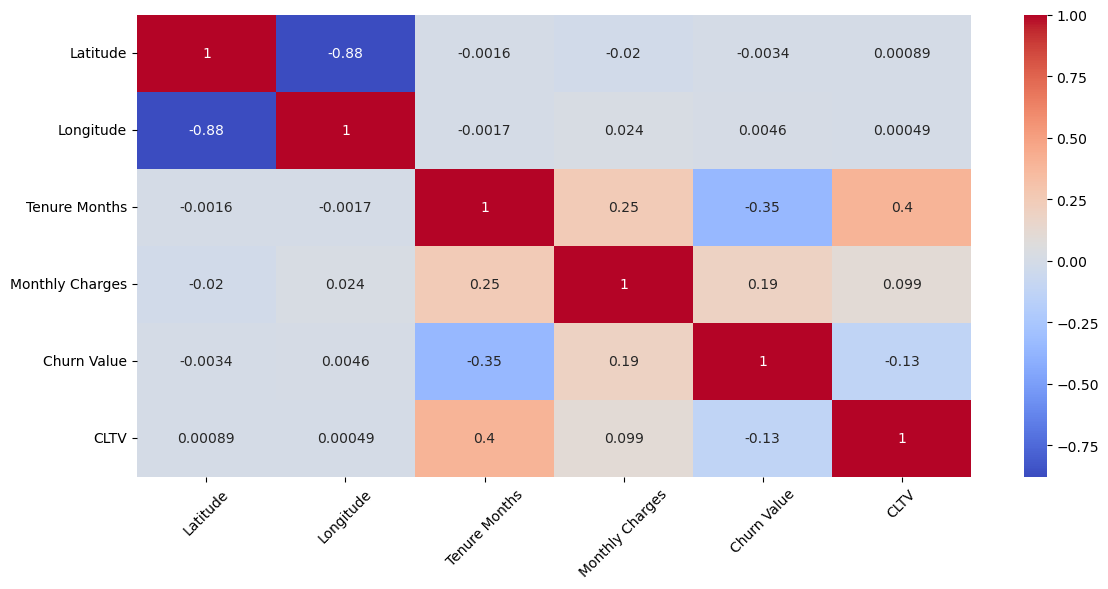

In [43]:
num_cols = data.select_dtypes(include=["int64", "float64"]).columns
corr = data[num_cols].corr()

plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("geo_corr2_heatmap.svg", bbox_inches="tight")
plt.show()

### Probamos a crear una Variable compuesta por Latitude y Longitud, a través de la obtención de 5 zonas geograficas

### Creamos la GeoZone

In [46]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = data.copy()

# 1) Asegurar numéricos y gestionar nulos
coords = df[["Latitude", "Longitude"]].apply(pd.to_numeric, errors="coerce")
mask_ok = coords.notna().all(axis=1)

# 2) Escalado (importante para KMeans)
scaler = StandardScaler()
X = scaler.fit_transform(coords.loc[mask_ok, ["Latitude", "Longitude"]])

# 3) Centroides iniciales (aprox) para 5 "zonas reales" de CA
#    (puedes ajustar si tu distribución está muy sesgada)
seed_centers = np.array([
    [37.7749, -122.4194],  # Bay Area (San Francisco)
    [34.0522, -118.2437],  # Greater Los Angeles (Los Angeles)
    [32.7157, -117.1611],  # San Diego (San Diego)
    [38.5816, -121.4944],  # Sacramento / NorCal interior (Sacramento)
    [36.7378, -119.7871],  # Central Valley (Fresno)
], dtype=float)

init_centers = scaler.transform(seed_centers)

# 4) KMeans arrancando desde esos centros
kmeans = KMeans(
    n_clusters=5,
    init=init_centers,
    n_init=1,           # mantenemos esos centros como arranque (no reintentos aleatorios)
    random_state=42
)

labels = kmeans.fit_predict(X)

# 5) Guardar cluster 1..5 + etiqueta "humana"
df["GeoCluster"] = np.nan
df.loc[mask_ok, "GeoCluster"] = (labels + 1).astype(int)

zone_names = {
    1: "Bay Area",
    2: "Greater Los Angeles",
    3: "San Diego",
    4: "Sacramento / NorCal interior",
    5: "Central Valley",
}
df["GeoZone"] = df["GeoCluster"].map(zone_names)

# (opcional) ver tamaños
print(df["GeoZone"].value_counts(dropna=False))


C:\tools\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\tools\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\tools\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\tools\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\tools\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(a

GeoZone
Bay Area                        2312
Greater Los Angeles             2101
San Diego                       1026
Central Valley                   804
Sacramento / NorCal interior     800
Name: count, dtype: int64


### Graficamos la GeoZone

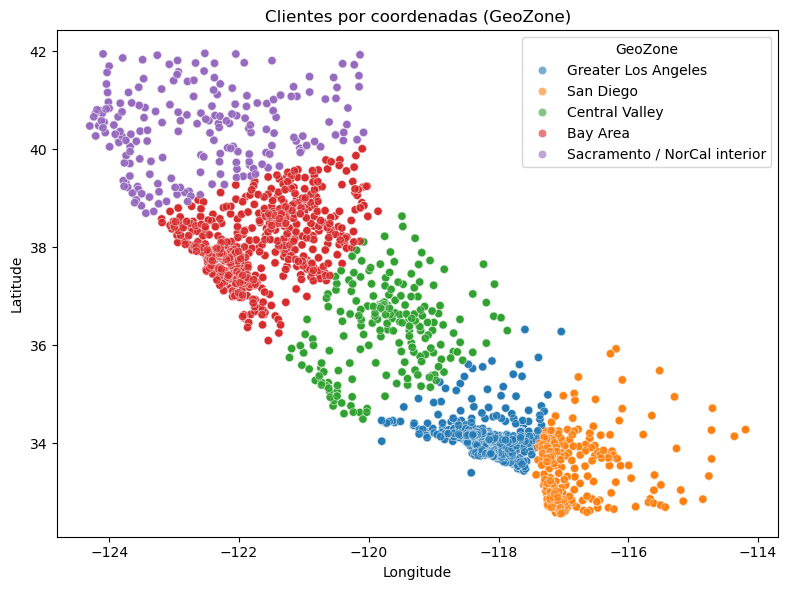

In [49]:
plot_df = df.loc[mask_ok, ["Longitude","Latitude","GeoZone"]].copy()

plt.figure(figsize=(8,6))
sns.scatterplot(data=plot_df, x="Longitude", y="Latitude", hue="GeoZone", alpha=0.6)
plt.title("Clientes por coordenadas (GeoZone)")

plt.tight_layout()
plt.savefig("geo_map_scatter.svg", bbox_inches="tight")
plt.show()


### Calculamos churn rate por zona

In [45]:
zone_summary = (
    df.groupby("GeoZone", dropna=False)
      .agg(
          n_clientes=("Churn Value", "size"),
          churn_total=("Churn Value", "sum"),
          churn_rate=("Churn Value", "mean")
      )
      .sort_values("n_clientes", ascending=False)
)

# (opcional) en porcentaje
zone_summary["churn_rate_pct"] = (zone_summary["churn_rate"] * 100).round(2)

zone_summary


n_clientes  churn_total  churn_rate  \
GeoZone                                                             
Bay Area                            2312          628    0.271626   
Greater Los Angeles                 2101          551    0.262256   
San Diego                           1026          293    0.285575   
Central Valley                       804          194    0.241294   
Sacramento / NorCal interior         800          203    0.253750   

                              churn_rate_pct  
GeoZone                                       
Bay Area                               27.16  
Greater Los Angeles                    26.23  
San Diego                              28.56  
Central Valley                         24.13  
Sacramento / NorCal interior           25.37

#### CON ESTOS DATOS VEMOS QUE NO HAY RELACIÓN ALGUNA ENTRE EL CHURN Y LAS ZONAS GEOGRÁFICAS: ELIMINAMOS LATITUD Y LONGITUD DEL MODELO

In [46]:
data.drop(columns=["Longitude","Latitude"], inplace=True)

In [47]:
data.columns

Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Churn Value', 'CLTV'],
      dtype='object')

## Creación de columnas Binarias y Dummies: 

### Primero colapsamos categorias redundantes. La tercera opcion de muchas variables viene explicada por otra columna
### En nuetro caso "no phone service" o "no internet service" ya vienen explicadas en **Phone Service** e **Internet Service** 

In [48]:
cols_no_internet = [
    "Online Security",
    "Online Backup",
    "Device Protection",
    "Tech Support",
    "Streaming TV",
    "Streaming Movies"
]

for col in cols_no_internet:
    data[col] = data[col].replace({"no internet service": "no"})


In [49]:
data["Multiple Lines"] = data["Multiple Lines"].replace({"no phone service": "no"})


In [50]:
cols_no_internet = [
    "Online Security",
    "Online Backup",
    "Device Protection",
    "Tech Support",
    "Streaming TV",
    "Streaming Movies",
    "Multiple Lines"
]

for i in cols_no_internet:
    print(data[i].unique())

<StringArray>
['yes', 'no']
Length: 2, dtype: string
<StringArray>
['yes', 'no']
Length: 2, dtype: string
<StringArray>
['no', 'yes']
Length: 2, dtype: string
<StringArray>
['no', 'yes']
Length: 2, dtype: string
<StringArray>
['no', 'yes']
Length: 2, dtype: string
<StringArray>
['no', 'yes']
Length: 2, dtype: string
<StringArray>
['no', 'yes']
Length: 2, dtype: string


In [51]:
data["Internet Service"].unique()

<StringArray>
['dsl', 'fiber optic', 'no']
Length: 3, dtype: string

In [52]:
data["Contract"].unique()

<StringArray>
['month-to-month', 'two year', 'one year']
Length: 3, dtype: string

In [53]:
data["Payment Method"].unique()

<StringArray>
[             'mailed check',          'electronic check',
 'bank transfer (automatic)',   'credit card (automatic)']
Length: 4, dtype: string

## binarias: 

In [54]:
# Columnas binarias Yes/No
cols_binarias = [
    "Senior Citizen",
    "Partner",
    "Dependents",
    "Phone Service",
    "Paperless Billing",
     "Online Security",
    "Online Backup",
    "Device Protection",
    "Tech Support",
    "Streaming TV",
    "Streaming Movies",
    "Multiple Lines"
]

# Mapear Yes → 1, No → 0
for col in cols_binarias:
    data[col] = data[col].map({"yes": 1, "no": 0})

# Gender (Male/Female)
data["Gender"] = data["Gender"].map({"male": 1, "female": 0})


In [55]:
cols_binarias = [
    "Senior Citizen",
    "Partner",
    "Dependents",
    "Phone Service",
    "Paperless Billing",
    "Online Security",
    "Online Backup",
    "Device Protection",
    "Tech Support",
    "Streaming TV",
    "Streaming Movies",
    "Multiple Lines",
    "Gender"
]

for i in cols_binarias: 
    print(data[i].unique())

[0 1]
[0 1]
[0 1]
[1 0]
[1 0]
[1 0]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]


In [56]:
data["Gender"].unique()

array([1, 0], dtype=int64)

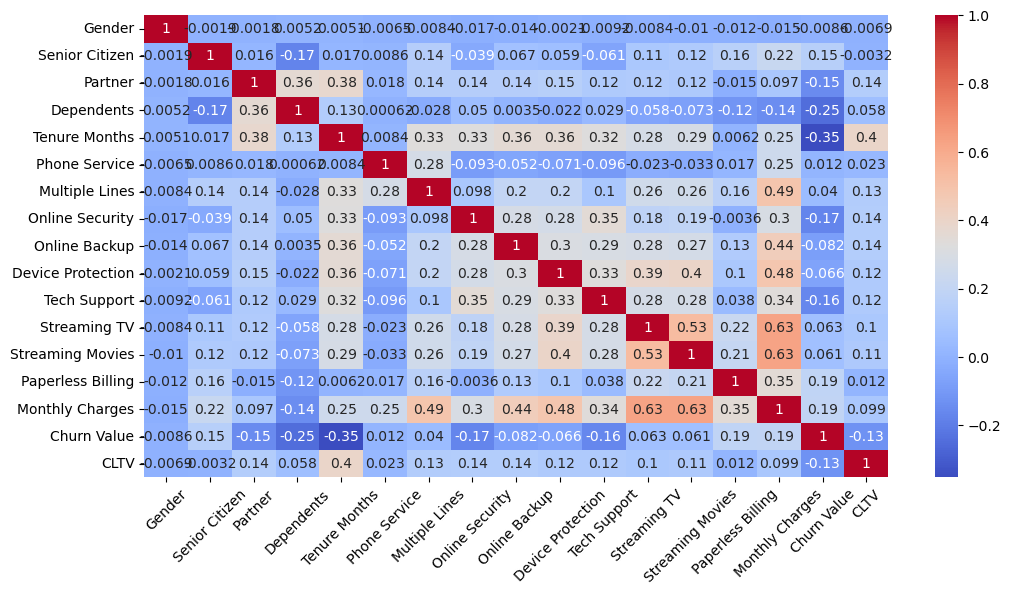

In [57]:
num_cols = data.select_dtypes(include=["int64", "float64"]).columns
corr = data[num_cols].corr()

plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.xticks(rotation=45)
plt.show()

#### Dummies:

In [58]:
cat_cols = data.select_dtypes(include=["string"]).columns.tolist()
print(cat_cols)

['Internet Service', 'Contract', 'Payment Method']


In [59]:
data_dummies = pd.get_dummies(data, columns=cat_cols, drop_first=True)

In [60]:
data_dummies.head()

Gender  Senior Citizen  Partner  Dependents  Tenure Months  Phone Service  \
0       1               0        0           0              2              1   
1       0               0        0           1              2              1   
2       0               0        0           1              8              1   
3       0               0        1           1             28              1   
4       1               0        0           1             49              1   

   Multiple Lines  Online Security  Online Backup  Device Protection  ...  \
0               0                1              1                  0  ...   
1               0                0              0                  0  ...   
2               1                0              0                  1  ...   
3               1                0              0                  1  ...   
4               1                0              1                  1  ...   

   Monthly Charges  Churn Value  CLTV  Internet Service_fiber optic  \
0            53.85            1  3239                         False   
1            70.70            1  2701                          True   
2            99.65            1  5372                          True   
3           104.80            1  5003                          True   
4           103.70            1  5340                          True   

   Internet Service_no  Contract_one year  Contract_two year  \
0                False              False              False   
1                False              False              False   
2                False              False              False   
3                False              False              False   
4                False              False              False   

   Payment Method_credit card (automatic)  Payment Method_electronic check  \
0                                   False                            False   
1                                   False                             True   
2                                   False                             True   
3                                   False                             True   
4                                   False                            False   

   Payment Method_mailed check  
0                         True  
1                        False  
2                        False  
3                        False  
4                        False  

[5 rows x 24 columns]

In [61]:
data_dummies.shape

(7043, 24)

#### transformamos todas las dummies a binarias

In [62]:
bool_cols = data_dummies.select_dtypes(include="bool").columns
data_dummies[bool_cols] = data_dummies[bool_cols].astype(int)

In [63]:
data_dummies.head()

Gender  Senior Citizen  Partner  Dependents  Tenure Months  Phone Service  \
0       1               0        0           0              2              1   
1       0               0        0           1              2              1   
2       0               0        0           1              8              1   
3       0               0        1           1             28              1   
4       1               0        0           1             49              1   

   Multiple Lines  Online Security  Online Backup  Device Protection  ...  \
0               0                1              1                  0  ...   
1               0                0              0                  0  ...   
2               1                0              0                  1  ...   
3               1                0              0                  1  ...   
4               1                0              1                  1  ...   

   Monthly Charges  Churn Value  CLTV  Internet Service_fiber optic  \
0            53.85            1  3239                             0   
1            70.70            1  2701                             1   
2            99.65            1  5372                             1   
3           104.80            1  5003                             1   
4           103.70            1  5340                             1   

   Internet Service_no  Contract_one year  Contract_two year  \
0                    0                  0                  0   
1                    0                  0                  0   
2                    0                  0                  0   
3                    0                  0                  0   
4                    0                  0                  0   

   Payment Method_credit card (automatic)  Payment Method_electronic check  \
0                                       0                                0   
1                                       0                                1   
2                                       0                                1   
3                                       0                                1   
4                                       0                                0   

   Payment Method_mailed check  
0                            1  
1                            0  
2                            0  
3                            0  
4                            0  

[5 rows x 24 columns]

## Separamos X e y

In [64]:
y = data_dummies["Churn Value"]
X = data_dummies.drop("Churn Value", axis=1)

In [65]:
X.shape, y.shape

((7043, 23), (7043,))

In [66]:
import pickle

payload = {
    "X": X,
    "y": y,
    "feature_names": X.columns.tolist()
}

with open("data_clean.pkl", "wb") as f:
    pickle.dump(payload, f, protocol=pickle.HIGHEST_PROTOCOL)


In [67]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Gender                                  7043 non-null   int64  
 1   Senior Citizen                          7043 non-null   int64  
 2   Partner                                 7043 non-null   int64  
 3   Dependents                              7043 non-null   int64  
 4   Tenure Months                           7043 non-null   int64  
 5   Phone Service                           7043 non-null   int64  
 6   Multiple Lines                          7043 non-null   int64  
 7   Online Security                         7043 non-null   int64  
 8   Online Backup                           7043 non-null   int64  
 9   Device Protection                       7043 non-null   int64  
 10  Tech Support                            7043 non-null   int6

## Creamos nuestros datos de Training y Test

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

## Analisis de Multicolinealidad sobre las variables explicativas (VIF)

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# funcion para calcular VIF con diferentes variables
def calc_vif(df):
    df_float = df.astype(float)
    vif = pd.DataFrame()
    vif["feature"] = df_float.columns
    vif["VIF"] = [
        variance_inflation_factor(df_float.values, i)
        for i in range(df_float.shape[1])
    ]
    return vif.sort_values("VIF", ascending=False).head(10)


In [70]:
vif = calc_vif(X_train)
vif

feature         VIF
14               Monthly Charges  268.613049
5                  Phone Service   46.539177
16  Internet Service_fiber optic   17.973299
15                          CLTV   17.463423
17           Internet Service_no    9.117469
4                  Tenure Months    8.146795
12              Streaming Movies    5.007370
11                  Streaming TV    4.932275
19             Contract_two year    3.457773
13             Paperless Billing    2.975507

C:\Users\osian\AppData\Local\Temp\ipykernel_4484\1126715163.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vif.sort_values("VIF", ascending=False),


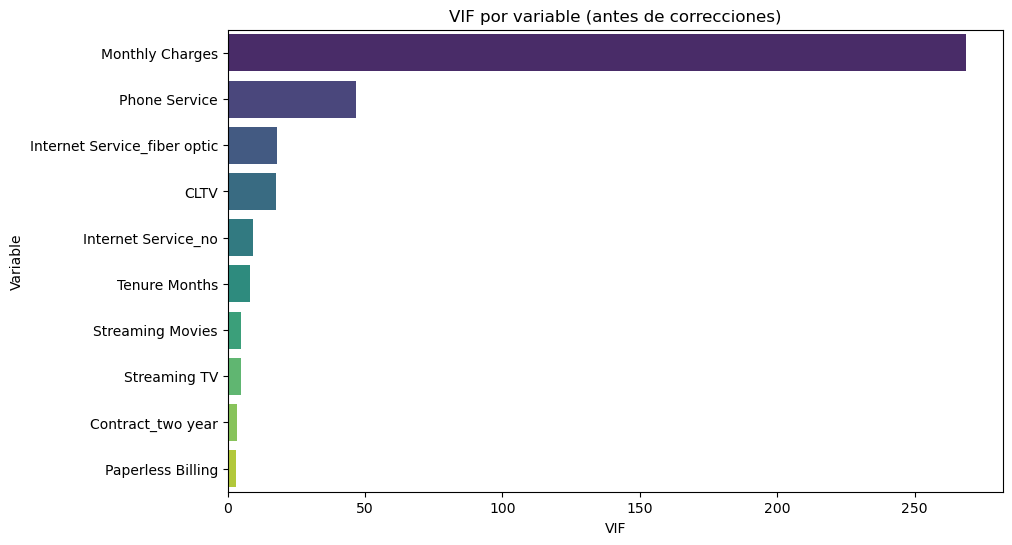

In [71]:
plt.figure(figsize=(10, 6))
sns.barplot(data=vif.sort_values("VIF", ascending=False), 
            x="VIF", y="feature", palette="viridis")
plt.title("VIF por variable (antes de correcciones)")
plt.xlabel("VIF")
plt.ylabel("Variable")
plt.show()


In [72]:
X_modified = X_train.drop(columns=["Monthly Charges","CLTV"])

In [73]:
vif_modified = calc_vif(X_modified)
vif_modified

feature       VIF
5                  Phone Service  9.205588
4                  Tenure Months  7.425138
14  Internet Service_fiber optic  3.635393
17             Contract_two year  3.453019
15           Internet Service_no  3.391528
13             Paperless Billing  2.745544
12              Streaming Movies  2.737658
11                  Streaming TV  2.730619
2                        Partner  2.579132
6                 Multiple Lines  2.442578

C:\Users\osian\AppData\Local\Temp\ipykernel_4484\3045609489.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vif_modified.sort_values("VIF", ascending=False),


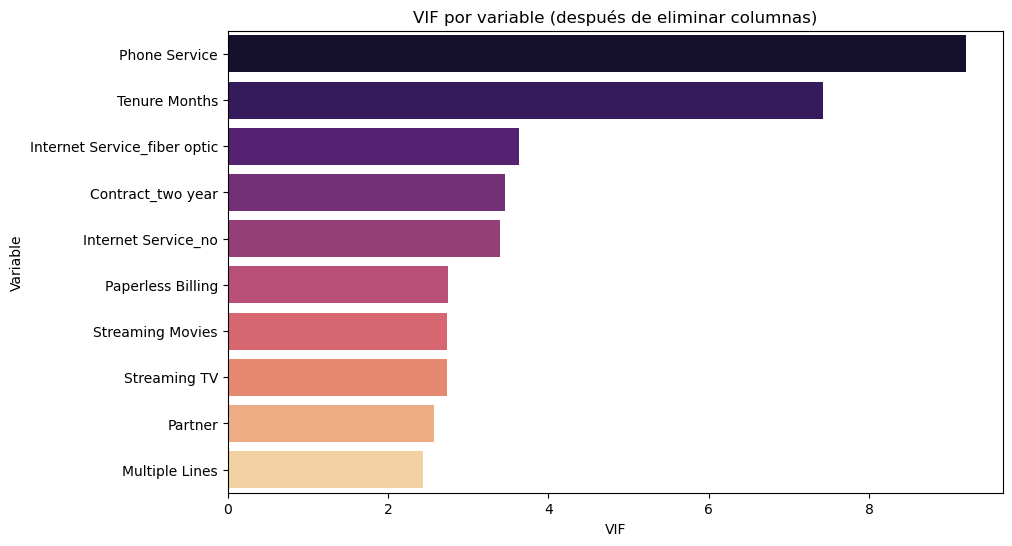

In [74]:
plt.figure(figsize=(10,6))
sns.barplot(data=vif_modified.sort_values("VIF", ascending=False), 
            x="VIF", y="feature", palette="magma")
plt.title("VIF por variable (después de eliminar columnas)")
plt.xlabel("VIF")
plt.ylabel("Variable")
plt.show()


### La variable Monthly Charges está claramente explicada por otras variables dentro del modelo. Tengo que tomar la decisión de si es más importante eliminar esta variable y perder un fuerza interpretativa o quedarme con el modelo menos dimensionado. Para ello voy a comprobar si realmente pierdo capacidad de predicción al mantener dicha columna


### Caminos a seguir: analisis a partir de AUC, Accuracy y Sensibilidad

In [75]:
X_train.columns

Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Paperless Billing', 'Monthly Charges', 'CLTV',
       'Internet Service_fiber optic', 'Internet Service_no',
       'Contract_one year', 'Contract_two year',
       'Payment Method_credit card (automatic)',
       'Payment Method_electronic check', 'Payment Method_mailed check'],
      dtype='object')

In [78]:
X_train_A = X_train.drop(columns=["Gender"])
X_test_A  = X_test.drop(columns=["Gender"])

X_train_B = X_train.drop(columns=["Monthly Charges"])
X_test_B  = X_test.drop(columns=["Monthly Charges"])

X_train_C = X_train.drop(columns=["Monthly Charges", "Tenure Months", "Phone Service"]) # aqui seguimos la pauta VIF < 5
X_test_C  = X_test.drop(columns=["Monthly Charges", "Tenure Months", "Phone Service"])

X_train_D = X_train.drop(columns=["Phone Service"])
X_test_D  = X_test.drop(columns=["Phone Service"])

X_train_E = X_train.drop(columns=["Internet Service_fiber optic", "Phone Service", "Monthly Charges"])
X_test_E  = X_test.drop(columns=["Internet Service_fiber optic", "Phone Service", "Monthly Charges"])

X_train_F = X_train
X_test_F  = X_test


In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, f1_score

# Diccionario con los distintos conjuntos de features
datasets = {
    "A": (X_train_A, X_test_A),
    "B": (X_train_B, X_test_B),
    "C": (X_train_C, X_test_C),
    "D": (X_train_D, X_test_D),
    "E": (X_train_E, X_test_E),
    "F": (X_train_F, X_test_F),
}

resultados = {}
modelos = {}

for nombre, (X_train_i, X_test_i) in datasets.items():
    # entrenas regresión logística
    modelo = LogisticRegression(max_iter=1000)
    modelo.fit(X_train_i, y_train)

    # guardo el modelo por si lo quieres usar después
    modelos[nombre] = modelo

    # evalúas
    y_pred_i = modelo.predict(X_test_i)
    y_proba_i = modelo.predict_proba(X_test_i)[:, 1]

    acc_i = accuracy_score(y_test, y_pred_i)
    auc_i = roc_auc_score(y_test, y_proba_i)
    recall_i = recall_score(y_test, y_pred_i, pos_label=1)
    f1_i = f1_score(y_test, y_pred_i, pos_label=1)

    resultados[nombre] = {
        "accuracy": acc_i,
        "roc_auc": auc_i,
        "recall": recall_i,
        "f1": f1_i,
    }

# Pasar a DataFrame para verlo más cómodo
resultados_df = pd.DataFrame(resultados).T
print(resultados_df)


C:\tools\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\tools\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_o

   accuracy   roc_auc    recall        f1
A  0.809749  0.852369  0.584670  0.620038
B  0.810222  0.852307  0.584670  0.620624
C  0.783720  0.833322  0.552585  0.575673
D  0.805017  0.851135  0.566845  0.606870
E  0.803124  0.845477  0.581105  0.610487
F  0.809749  0.852386  0.584670  0.620038


C:\tools\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### La métrica relevante es el AUC y la SENSIBILIDAD, que en este caso son 0.85 y 0.58 respectivamente, lo que indica un modelo sólido y bien calibrado, aunque con un déficit de capacidad de predecir los clientes que se van
## nos quedamos con la opción F, ya que evidentemente mantener la columna Monthly Charges no afecta practicamente a la capacidad de predicción

##### el modelo identifica correctamente al 58 % de los clientes que abandonan el servicio, dejando sin detectar aproximadamente al 42 %. Por tanto, la capacidad de detección de clientes en riesgo de churn es limitada y presenta margen de mejora, especialmente si el objetivo de negocio es minimizar las bajas no anticipadas.” 
### Solucionaremos este problema en la siguiente fase del proyecto, aplicando smote a nuestros datos

In [76]:
with open("train_test_data.pkl", "wb") as f:
    pickle.dump((X_train, X_test, y_train, y_test), f)
